In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

A 6-month CPI forecast using ML and lag features.

In [2]:
# Load feature dataset
df_model = pd.read_csv("F:/ML/CPI/Weighted_CPI_Forecasting/featured_cpi.csv", parse_dates=["Date"])

In [3]:
# Make sure data is sorted
df_model = df_model.sort_values("Date")

In [4]:
# Features and target
features = ["Lag_1", "Lag_2", "Lag_3", "Month"]
target = "Weighted_CPI"

X_train = df_model[features]
y_train = df_model[target]

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Forecasting next 6 months of CPI.

In [5]:
# Start from the last known row
last_known = df_model.iloc[-1].copy()
forecast = []

for i in range(6):
    # Step 1: Get next month date
    next_date = last_known["Date"] + pd.DateOffset(months=1)
    month = next_date.month
    year = next_date.year

    # Step 2: Calculate sin and cos transforms for month
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)

    # Step 3: Prepare input row for prediction
    X_pred = pd.DataFrame([{
        "Lag_1": last_known["Weighted_CPI"],
        "Lag_2": last_known["Lag_1"],
        "Lag_3": last_known["Lag_2"],
        "Month": month,
    }])

    # Step 4: Predict CPI
    pred_cpi = model.predict(X_pred)[0]

    # Step 5: Store forecast
    forecast.append({
        "Date": next_date,
        "Predicted_Weighted_CPI": pred_cpi
    })

    # Step 6: Update for next iteration
    last_known = {
        "Date": next_date,
        "Weighted_CPI": pred_cpi,
        "Lag_1": last_known["Weighted_CPI"],
        "Lag_2": last_known["Lag_1"],
        "Lag_3": last_known["Lag_2"]
    }

Plotting the Forecasted CPI and Historical CPI for visualization.

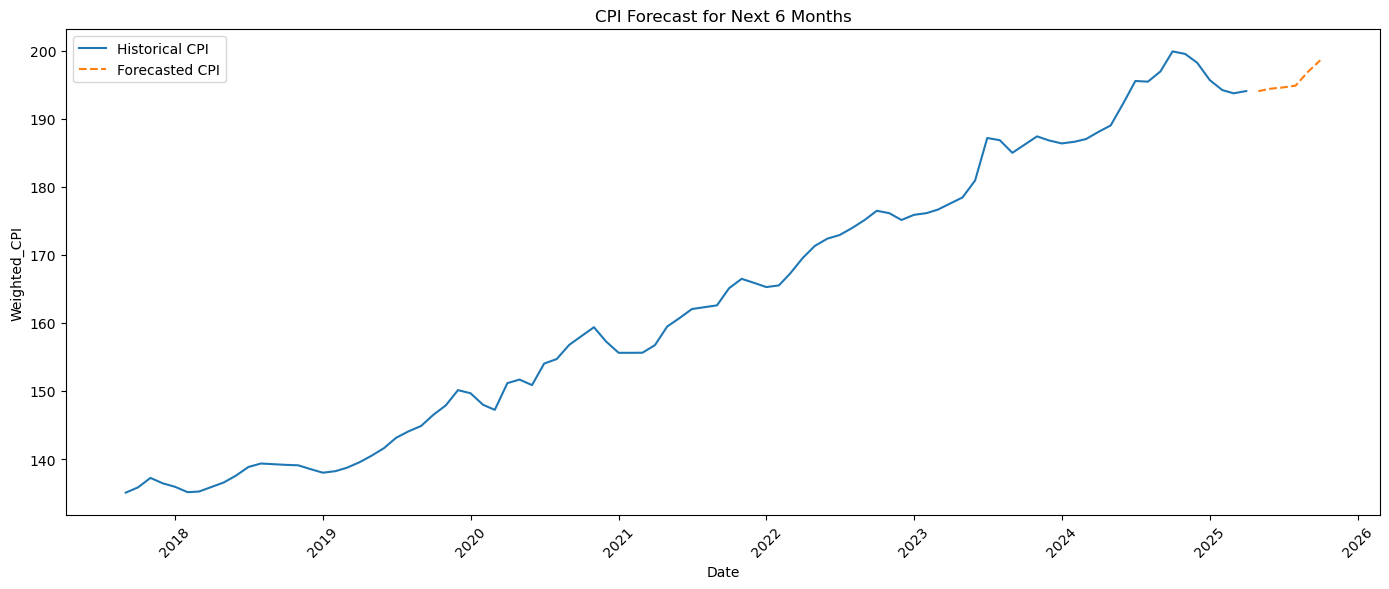

In [7]:
# Plotting the data
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_model, x="Date", y="Weighted_CPI", label="Historical CPI")
sns.lineplot(data=forecast_df, x="Date", y="Predicted_Weighted_CPI", label="Forecasted CPI", linestyle='--')
plt.title("CPI Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Weighted_CPI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Final forecast DataFrame
forecast_df = pd.DataFrame(forecast)

# Save to CSV
forecast_df.to_csv("F:/ML/CPI/Weighted_CPI_Forecasting/cpi_forecast_6months.csv", index=False)